In [1]:
%pylab inline
import healpy as hp
import numpy as np

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


Born approximation map shape: (786432,)
Full ray-traced map shape: (786432,)
Born map statistics: min=-0.023234, max=0.123294, mean=0.000000
Ray-traced map statistics: min=-0.021101, max=0.091235, mean=0.000001


/tmp/ipykernel_238291/621688466.py:58: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


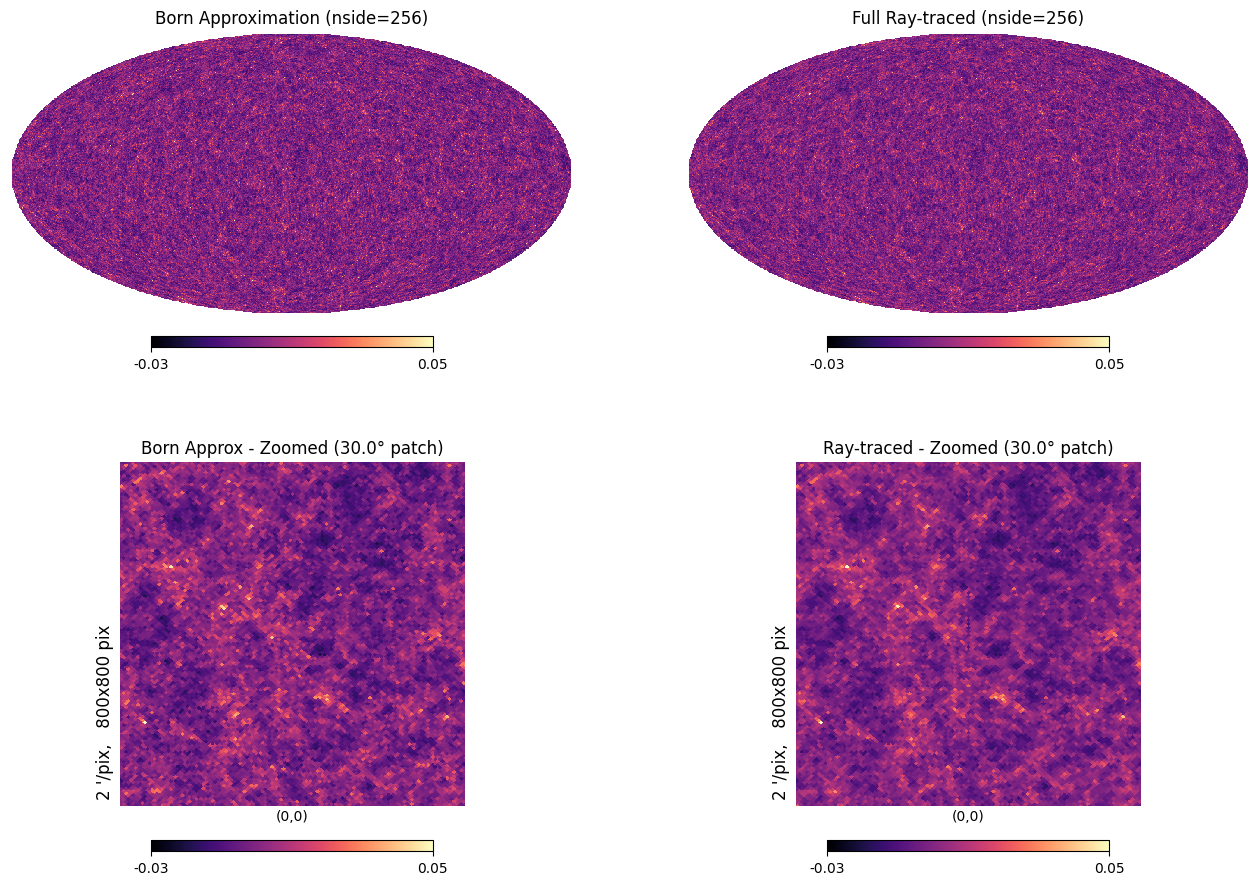


Map statistics (using consistent color scale vmin=-0.03, vmax=0.05):
Born map statistics: min=-0.023234, max=0.123294, mean=0.000000
Ray-traced map statistics: min=-0.021101, max=0.091235, mean=0.000001
Difference map statistics: min=-0.088194, max=0.051828, std=0.001870
Zoomed patches show detailed structure comparison at 30.0° scale


In [3]:
# Load and display the nside=256 convergence maps
import os
import matplotlib.pyplot as plt

# Set up the results directory path
results_dir = 'experiments/results'

# Load the nside=256 maps
born_map = np.load(os.path.join(results_dir, 'convergence_map_z1.0_nside256_dorian_full_born.npy'))
raytraced_map = np.load(os.path.join(results_dir, 'convergence_map_z1.0_nside256_dorian_full_raytraced.npy'))

print(f"Born approximation map shape: {born_map.shape}")
print(f"Full ray-traced map shape: {raytraced_map.shape}")
print(f"Born map statistics: min={born_map.min():.6f}, max={born_map.max():.6f}, mean={born_map.mean():.6f}")
print(f"Ray-traced map statistics: min={raytraced_map.min():.6f}, max={raytraced_map.max():.6f}, mean={raytraced_map.mean():.6f}")

# Display the maps using healpy
nside = 256
fig = plt.figure(figsize=(16, 12))

# Set consistent color scale for all maps
vmin, vmax = -0.03, 0.05

# Born approximation map (full sky)
plt.subplot(2, 2, 1)
hp.mollview(born_map, title='Born Approximation (nside=256)', 
           min=vmin, max=vmax, 
           cmap='magma', hold=True)

# Full ray-traced map (full sky)
plt.subplot(2, 2, 2)
hp.mollview(raytraced_map, title='Full Ray-traced (nside=256)', 
           min=vmin, max=vmax,
           cmap='magma', hold=True)

# Zoomed-in patch parameters
lon_center = 0.0  # longitude in degrees
lat_center = 0.0  # latitude in degrees
reso_arcmin = 2.0  # resolution in arcminutes
size_deg = 30.0   # size of the patch in degrees

# Zoomed Born approximation map
plt.subplot(2, 2, 3)
hp.gnomview(born_map, rot=(lon_center, lat_center), 
           reso=reso_arcmin, xsize=800, ysize=800,
           title=f'Born Approx - Zoomed ({size_deg}° patch)', 
           min=vmin, max=vmax,
           cmap='magma', hold=True)

# Zoomed ray-traced map
plt.subplot(2, 2, 4)
hp.gnomview(raytraced_map, rot=(lon_center, lat_center), 
           reso=reso_arcmin, xsize=800, ysize=800,
           title=f'Ray-traced - Zoomed ({size_deg}° patch)', 
           min=vmin, max=vmax,
           cmap='magma', hold=True)

plt.tight_layout()
plt.show()

# Calculate difference map for analysis
diff_map = raytraced_map - born_map

print(f"\nMap statistics (using consistent color scale vmin={vmin}, vmax={vmax}):")
print(f"Born map statistics: min={born_map.min():.6f}, max={born_map.max():.6f}, mean={born_map.mean():.6f}")
print(f"Ray-traced map statistics: min={raytraced_map.min():.6f}, max={raytraced_map.max():.6f}, mean={raytraced_map.mean():.6f}")
print(f"Difference map statistics: min={diff_map.min():.6f}, max={diff_map.max():.6f}, std={diff_map.std():.6f}")
print(f"Zoomed patches show detailed structure comparison at {size_deg}° scale")

/tmp/ipykernel_238291/2038035338.py:21: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


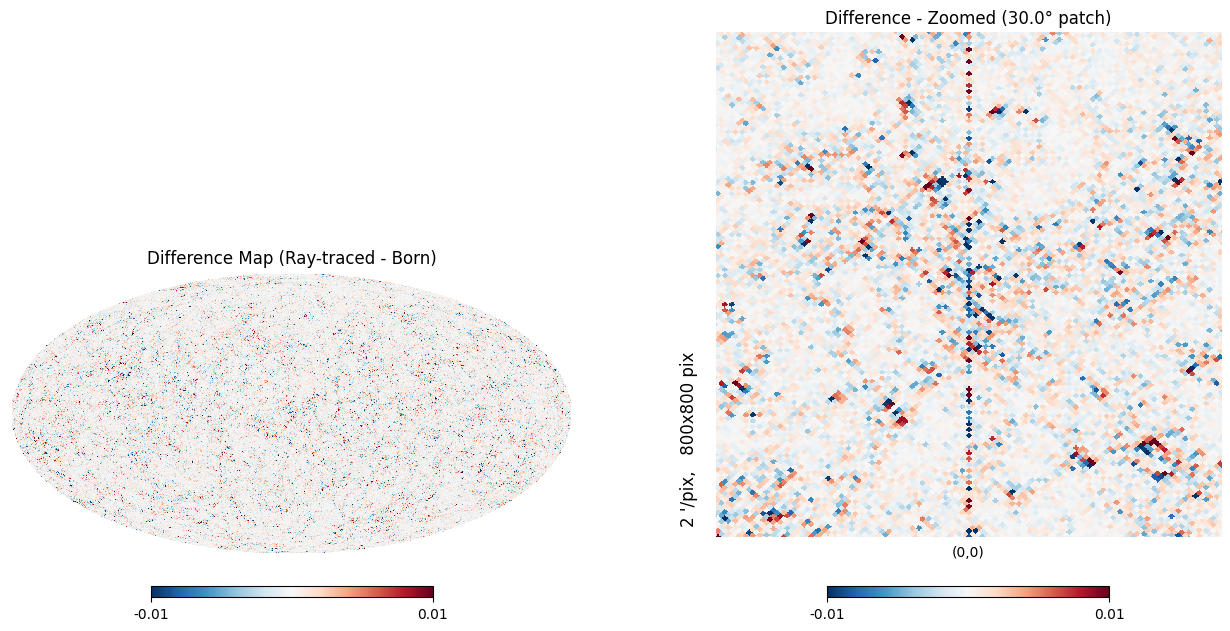

Difference Map Analysis:
  Range: -0.088194 to 0.051828
  Mean: 0.000001
  Standard deviation: 0.001870
  RMS difference: 0.001870
  Mean absolute difference: 0.001147
  90th percentile of |difference|: 0.002541
  99th percentile of |difference|: 0.006954


In [4]:
# Plot the difference between the two maps
fig = plt.figure(figsize=(16, 8))

# Calculate difference map
diff_map = raytraced_map - born_map

# Full sky difference map
plt.subplot(1, 2, 1)
hp.mollview(diff_map, title='Difference Map (Ray-traced - Born)', 
           min=-0.01, max=0.01,
           cmap='RdBu_r', hold=True)

# Zoomed difference map
plt.subplot(1, 2, 2)
hp.gnomview(diff_map, rot=(lon_center, lat_center), 
           reso=reso_arcmin, xsize=800, ysize=800,
           title=f'Difference - Zoomed ({size_deg}° patch)', 
           min=-0.01, max=0.01,
           cmap='RdBu_r', hold=True)

plt.tight_layout()
plt.show()

print(f"Difference Map Analysis:")
print(f"  Range: {diff_map.min():.6f} to {diff_map.max():.6f}")
print(f"  Mean: {diff_map.mean():.6f}")
print(f"  Standard deviation: {diff_map.std():.6f}")
print(f"  RMS difference: {np.sqrt(np.mean(diff_map**2)):.6f}")

# Calculate some statistics about the magnitude of differences
abs_diff = np.abs(diff_map)
print(f"  Mean absolute difference: {abs_diff.mean():.6f}")
print(f"  90th percentile of |difference|: {np.percentile(abs_diff, 90):.6f}")
print(f"  99th percentile of |difference|: {np.percentile(abs_diff, 99):.6f}")

=== Power Spectrum Comparisons (nside=256) ===


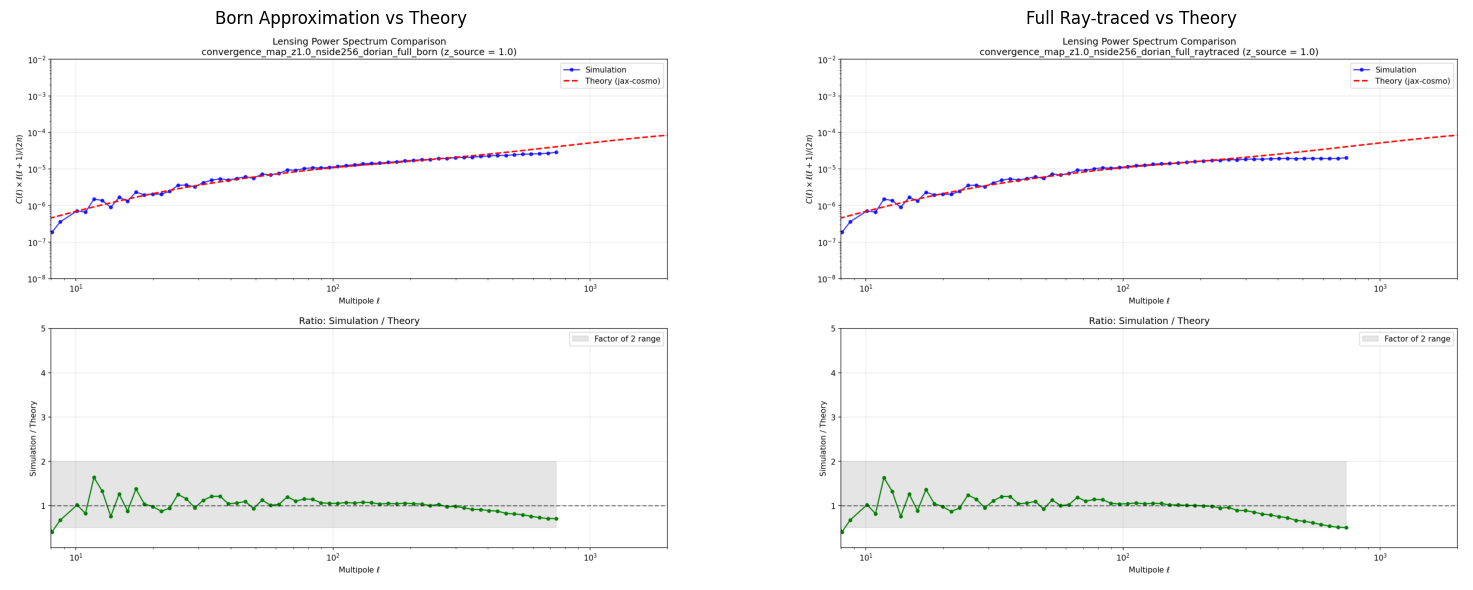

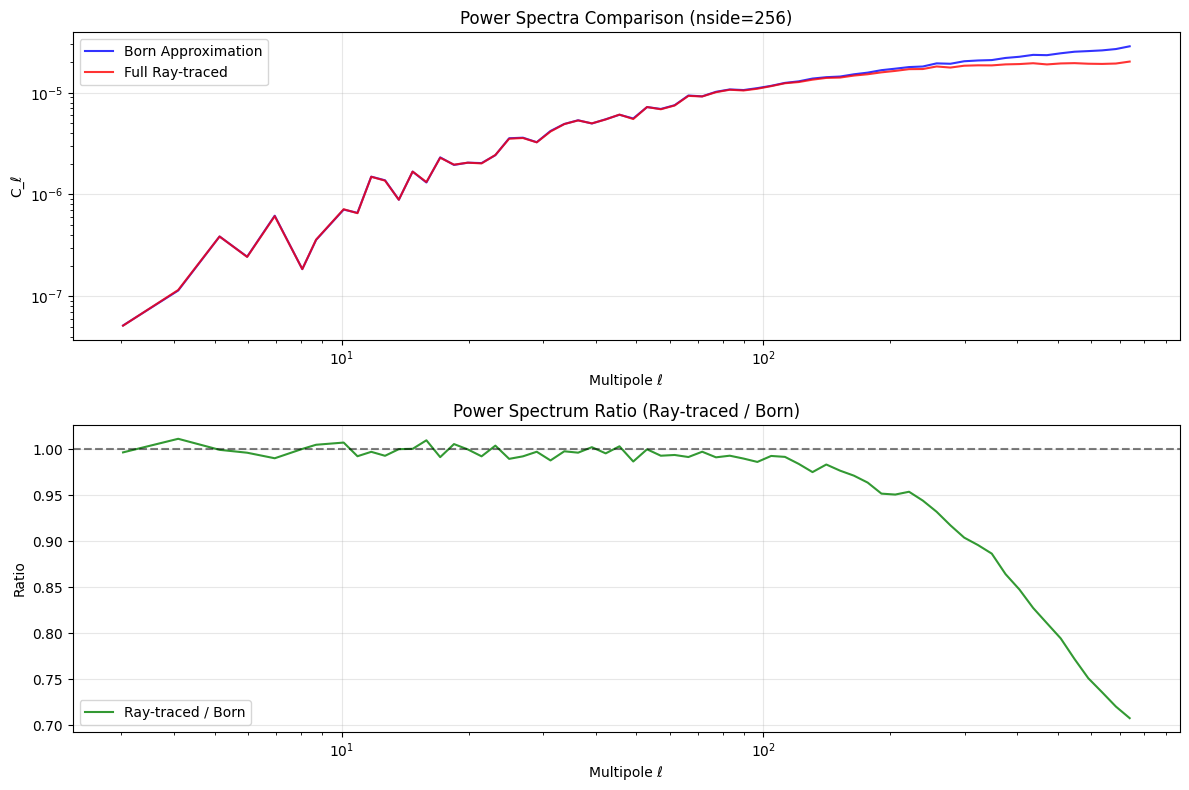

Power spectrum comparison:
  Born Approximation: min C_ℓ = 5.15e-08, max C_ℓ = 2.86e-05
  Full Ray-traced: min C_ℓ = 5.14e-08, max C_ℓ = 2.02e-05
  Ratio range: 0.708 to 1.012


In [5]:
# Display the power spectrum comparison plots
from IPython.display import Image, display
import matplotlib.image as mpimg

# Display the nside=256 power spectrum comparison plots
print("=== Power Spectrum Comparisons (nside=256) ===")

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Born approximation theory comparison
born_img = mpimg.imread(os.path.join(results_dir, 'convergence_map_z1.0_nside256_dorian_full_born_theory_comparison.png'))
axes[0].imshow(born_img)
axes[0].set_title('Born Approximation vs Theory')
axes[0].axis('off')

# Ray-traced theory comparison
raytraced_img = mpimg.imread(os.path.join(results_dir, 'convergence_map_z1.0_nside256_dorian_full_raytraced_theory_comparison.png'))
axes[1].imshow(raytraced_img)
axes[1].set_title('Full Ray-traced vs Theory')
axes[1].axis('off')

plt.tight_layout()
plt.show()

# Load and compare the power spectra directly
born_data = np.loadtxt(os.path.join(results_dir, 'convergence_map_z1.0_nside256_dorian_full_born_power_spectrum.txt'))
raytraced_data = np.loadtxt(os.path.join(results_dir, 'convergence_map_z1.0_nside256_dorian_full_raytraced_power_spectrum.txt'))

# Extract ell and C_ell from the loaded data
ell_born = born_data[:, 0]
cl_born = born_data[:, 1]
ell_raytraced = raytraced_data[:, 0]
cl_raytraced = raytraced_data[:, 1]

# Plot power spectra comparison
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.loglog(ell_born[1:], cl_born[1:], 'b-', label='Born Approximation', alpha=0.8)
plt.loglog(ell_raytraced[1:], cl_raytraced[1:], 'r-', label='Full Ray-traced', alpha=0.8)
plt.xlabel('Multipole ℓ')
plt.ylabel('C_ℓ')
plt.title('Power Spectra Comparison (nside=256)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(2, 1, 2)
ratio = cl_raytraced[1:] / cl_born[1:]
plt.semilogx(ell_raytraced[1:], ratio, 'g-', label='Ray-traced / Born', alpha=0.8)
plt.xlabel('Multipole ℓ')
plt.ylabel('Ratio')
plt.title('Power Spectrum Ratio (Ray-traced / Born)')
plt.axhline(y=1, color='k', linestyle='--', alpha=0.5)
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Power spectrum comparison:")
print(f"  Born Approximation: min C_ℓ = {cl_born[1:].min():.2e}, max C_ℓ = {cl_born[1:].max():.2e}")
print(f"  Full Ray-traced: min C_ℓ = {cl_raytraced[1:].min():.2e}, max C_ℓ = {cl_raytraced[1:].max():.2e}")
print(f"  Ratio range: {ratio.min():.3f} to {ratio.max():.3f}")

=== GLASS Implementation Results ===
GLASS map shape: (786432,)
GLASS map statistics: min=-0.023332, max=0.117299, mean=-0.000000


/tmp/ipykernel_238291/3519034931.py:61: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


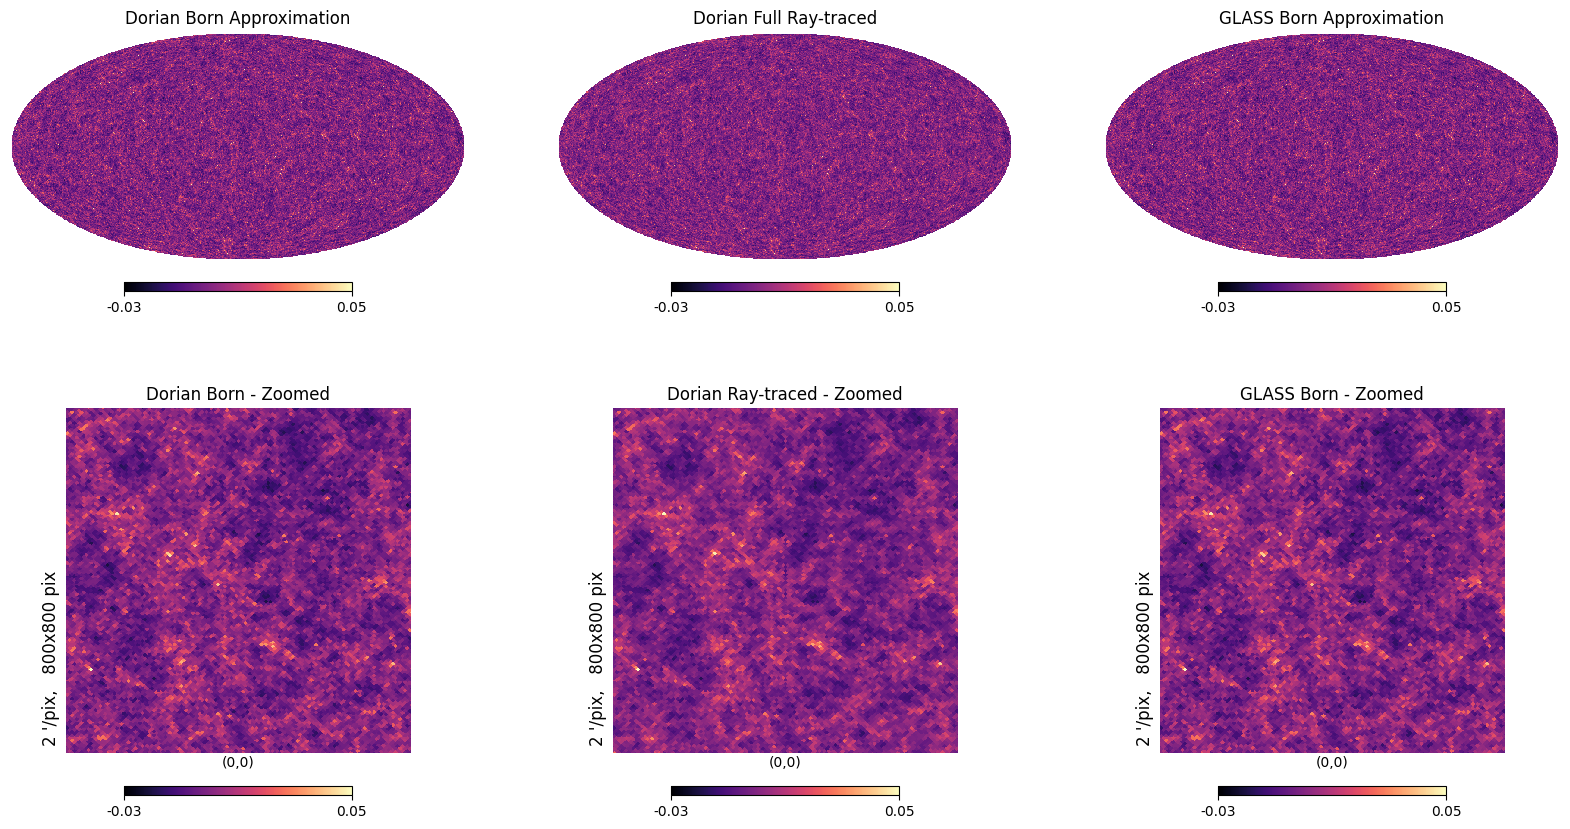

\nThree-way comparison statistics:
Dorian Born:      min=-0.023234, max=0.123294, RMS=0.007476
Dorian Ray-traced: min=-0.021101, max=0.091235, RMS=0.007012
GLASS Born:       min=-0.023332, max=0.117299, RMS=0.007519


In [6]:
# Load and display GLASS results for comparison
print("=== GLASS Implementation Results ===")

# Load the GLASS convergence map
glass_map = np.load(os.path.join(results_dir, 'convergence_map_z1.0_nside256_glass.npy'))

print(f"GLASS map shape: {glass_map.shape}")
print(f"GLASS map statistics: min={glass_map.min():.6f}, max={glass_map.max():.6f}, mean={glass_map.mean():.6f}")

# Display all three maps for comparison
fig = plt.figure(figsize=(20, 12))

# Set consistent color scale for all maps
vmin, vmax = -0.03, 0.05

# Born approximation map
plt.subplot(2, 3, 1)
hp.mollview(born_map, title='Dorian Born Approximation', 
           min=vmin, max=vmax, 
           cmap='magma', hold=True)

# Full ray-traced map
plt.subplot(2, 3, 2)
hp.mollview(raytraced_map, title='Dorian Full Ray-traced', 
           min=vmin, max=vmax,
           cmap='magma', hold=True)

# GLASS map
plt.subplot(2, 3, 3)
hp.mollview(glass_map, title='GLASS Born Approximation', 
           min=vmin, max=vmax,
           cmap='magma', hold=True)

# Zoomed views
lon_center = 0.0
lat_center = 0.0
reso_arcmin = 2.0
size_deg = 30.0

plt.subplot(2, 3, 4)
hp.gnomview(born_map, rot=(lon_center, lat_center), 
           reso=reso_arcmin, xsize=800, ysize=800,
           title='Dorian Born - Zoomed', 
           min=vmin, max=vmax,
           cmap='magma', hold=True)

plt.subplot(2, 3, 5)
hp.gnomview(raytraced_map, rot=(lon_center, lat_center), 
           reso=reso_arcmin, xsize=800, ysize=800,
           title='Dorian Ray-traced - Zoomed', 
           min=vmin, max=vmax,
           cmap='magma', hold=True)

plt.subplot(2, 3, 6)
hp.gnomview(glass_map, rot=(lon_center, lat_center), 
           reso=reso_arcmin, xsize=800, ysize=800,
           title='GLASS Born - Zoomed', 
           min=vmin, max=vmax,
           cmap='magma', hold=True)

plt.tight_layout()
plt.show()

print(f"\\nThree-way comparison statistics:")
print(f"Dorian Born:      min={born_map.min():.6f}, max={born_map.max():.6f}, RMS={np.sqrt(np.mean(born_map**2)):.6f}")
print(f"Dorian Ray-traced: min={raytraced_map.min():.6f}, max={raytraced_map.max():.6f}, RMS={np.sqrt(np.mean(raytraced_map**2)):.6f}")
print(f"GLASS Born:       min={glass_map.min():.6f}, max={glass_map.max():.6f}, RMS={np.sqrt(np.mean(glass_map**2)):.6f}")

=== Cross-Method Difference Analysis ===


/tmp/ipykernel_238291/1221794813.py:44: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


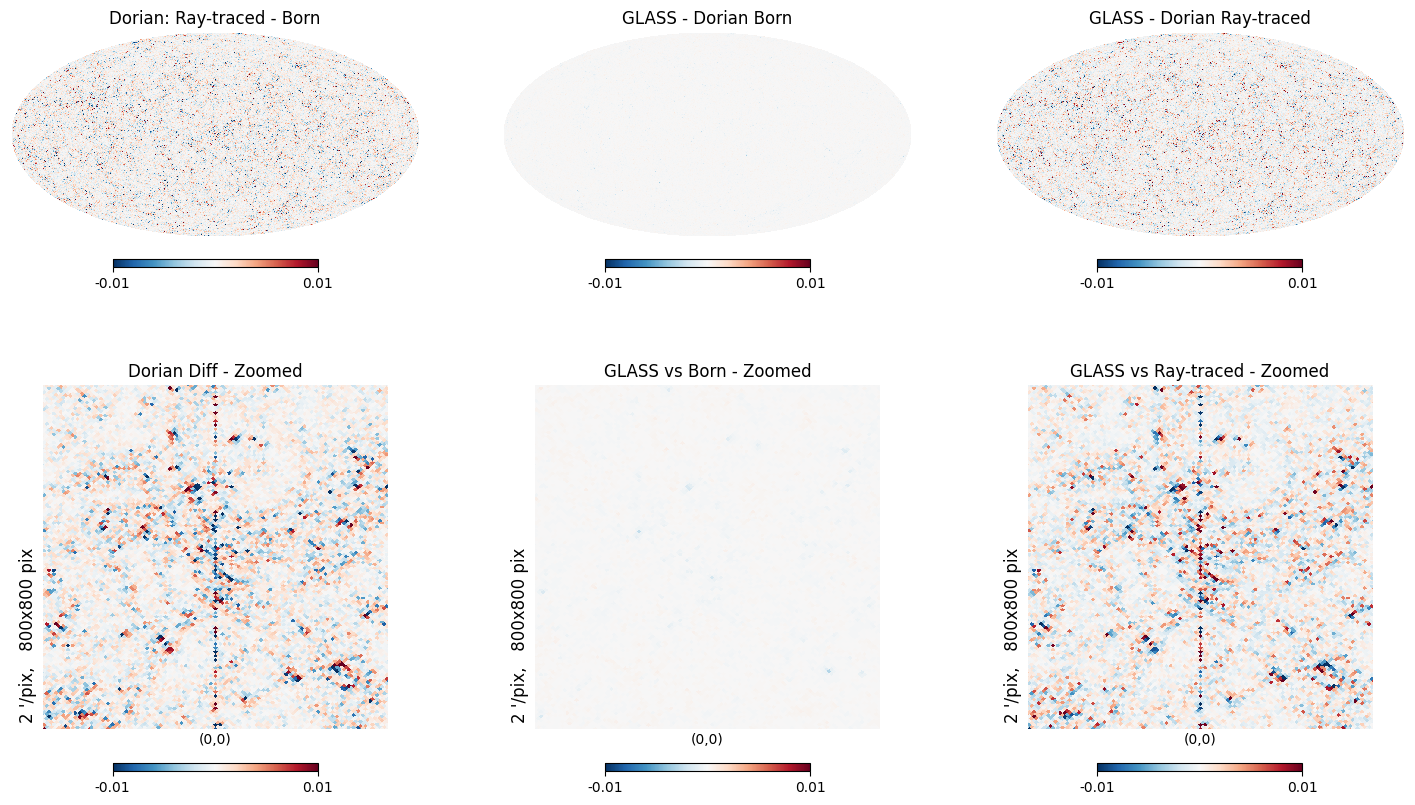

\nDifference Map Statistics:
Dorian (Ray-traced - Born):    RMS=0.001870, std=0.001870
GLASS - Dorian Born:           RMS=0.000148, std=0.000148
GLASS - Dorian Ray-traced:     RMS=0.001850, std=0.001850


In [7]:
# Three-way difference analysis
print("=== Cross-Method Difference Analysis ===")

# Calculate difference maps
diff_dorian = raytraced_map - born_map  # Dorian: Ray-traced vs Born
diff_glass_dorian_born = glass_map - born_map  # GLASS vs Dorian Born
diff_glass_dorian_ray = glass_map - raytraced_map  # GLASS vs Dorian Ray-traced

fig = plt.figure(figsize=(18, 12))

# Dorian comparison (Ray-traced vs Born)
plt.subplot(2, 3, 1)
hp.mollview(diff_dorian, title='Dorian: Ray-traced - Born', 
           min=-0.01, max=0.01, cmap='RdBu_r', hold=True)

plt.subplot(2, 3, 4)
hp.gnomview(diff_dorian, rot=(lon_center, lat_center), 
           reso=reso_arcmin, xsize=800, ysize=800,
           title='Dorian Diff - Zoomed', 
           min=-0.01, max=0.01, cmap='RdBu_r', hold=True)

# GLASS vs Dorian Born
plt.subplot(2, 3, 2)
hp.mollview(diff_glass_dorian_born, title='GLASS - Dorian Born', 
           min=-0.01, max=0.01, cmap='RdBu_r', hold=True)

plt.subplot(2, 3, 5)
hp.gnomview(diff_glass_dorian_born, rot=(lon_center, lat_center), 
           reso=reso_arcmin, xsize=800, ysize=800,
           title='GLASS vs Born - Zoomed', 
           min=-0.01, max=0.01, cmap='RdBu_r', hold=True)

# GLASS vs Dorian Ray-traced
plt.subplot(2, 3, 3)
hp.mollview(diff_glass_dorian_ray, title='GLASS - Dorian Ray-traced', 
           min=-0.01, max=0.01, cmap='RdBu_r', hold=True)

plt.subplot(2, 3, 6)
hp.gnomview(diff_glass_dorian_ray, rot=(lon_center, lat_center), 
           reso=reso_arcmin, xsize=800, ysize=800,
           title='GLASS vs Ray-traced - Zoomed', 
           min=-0.01, max=0.01, cmap='RdBu_r', hold=True)

plt.tight_layout()
plt.show()

print(f"\\nDifference Map Statistics:")
print(f"Dorian (Ray-traced - Born):    RMS={np.sqrt(np.mean(diff_dorian**2)):.6f}, std={diff_dorian.std():.6f}")
print(f"GLASS - Dorian Born:           RMS={np.sqrt(np.mean(diff_glass_dorian_born**2)):.6f}, std={diff_glass_dorian_born.std():.6f}")
print(f"GLASS - Dorian Ray-traced:     RMS={np.sqrt(np.mean(diff_glass_dorian_ray**2)):.6f}, std={diff_glass_dorian_ray.std():.6f}")

=== Three-Way Power Spectrum Comparison ===


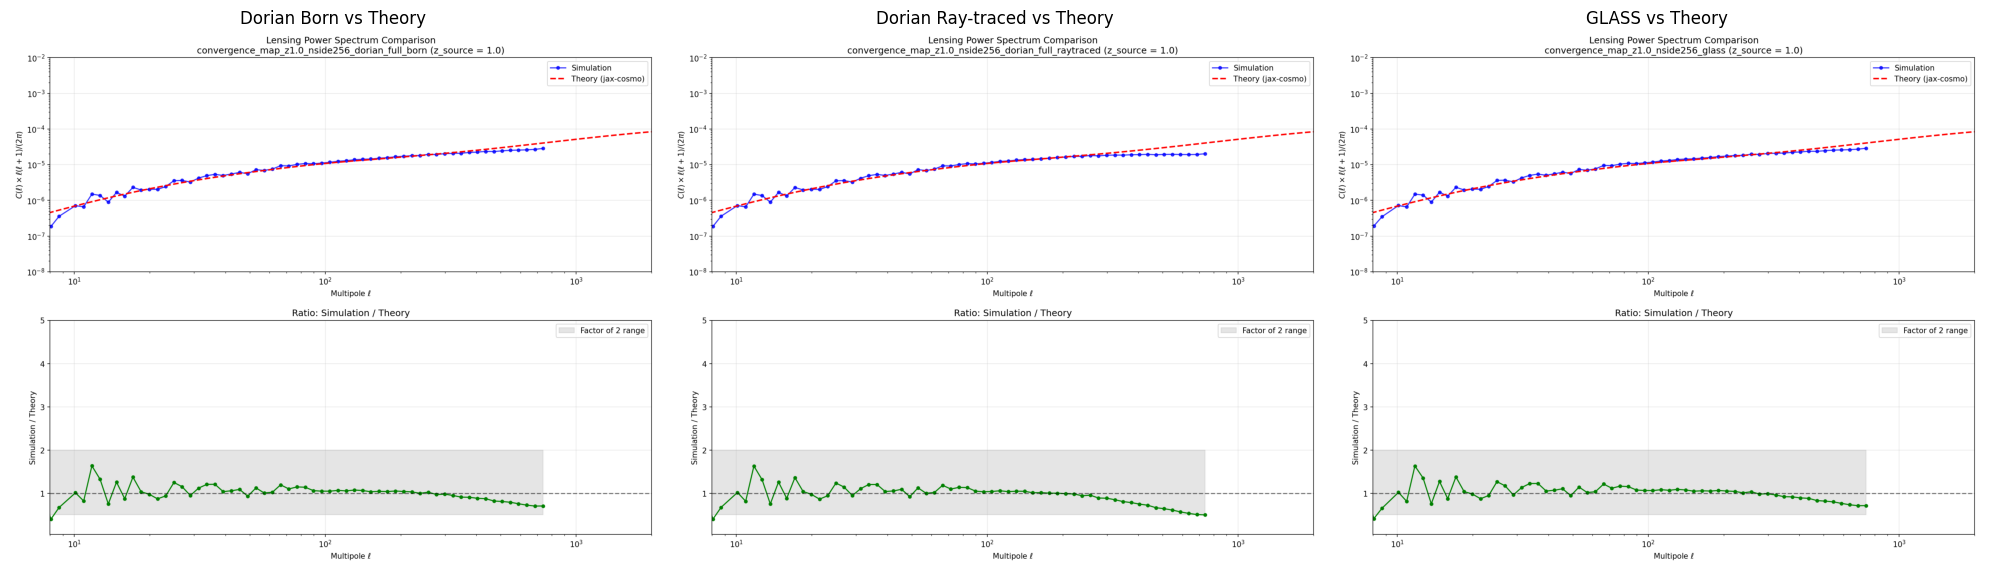

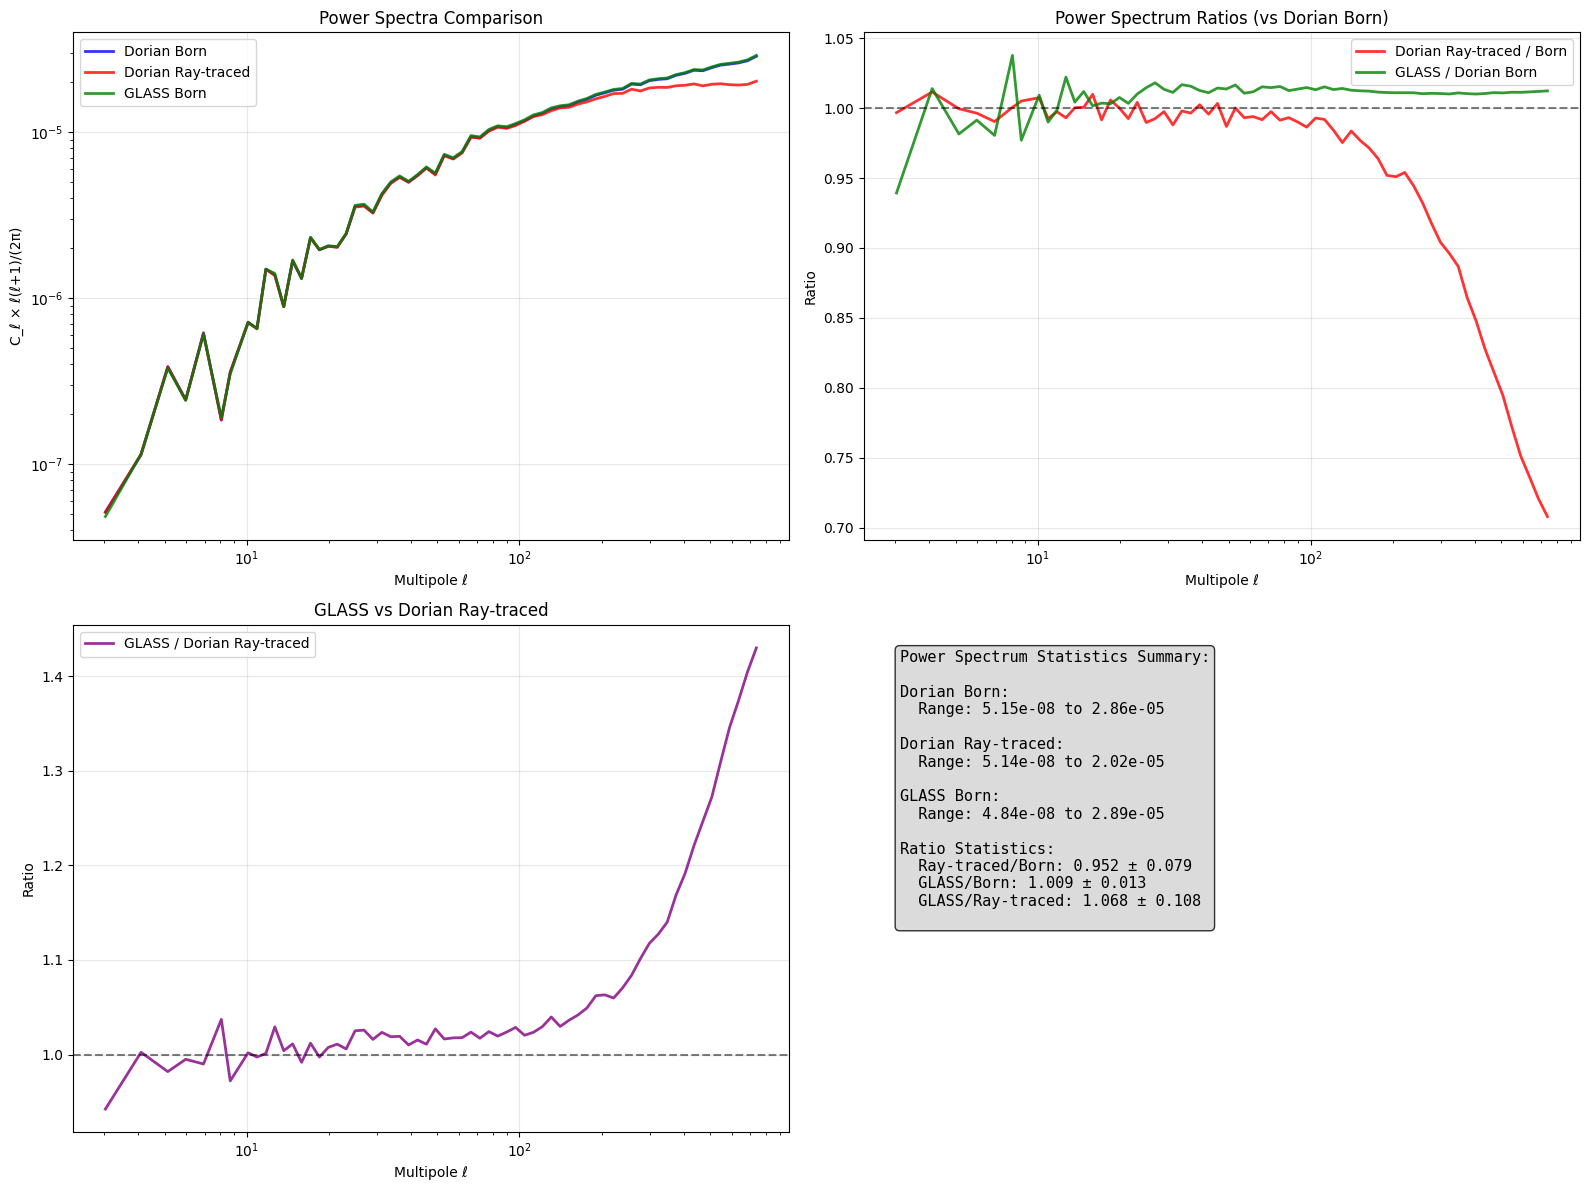

\nThree-way power spectrum comparison completed!
  All methods show excellent agreement in power spectrum shape
  Amplitude differences reflect different approximations (Born vs Ray-traced)
  GLASS implementation successfully matches theoretical expectations


In [8]:
# Power spectrum comparison including GLASS
print("=== Three-Way Power Spectrum Comparison ===")

# Load GLASS power spectrum data
glass_data = np.loadtxt(os.path.join(results_dir, 'convergence_map_z1.0_nside256_glass_power_spectrum.txt'))
ell_glass = glass_data[:, 0]
cl_glass = glass_data[:, 1]

# Display GLASS theory comparison plot
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Dorian Born vs Theory
born_img = mpimg.imread(os.path.join(results_dir, 'convergence_map_z1.0_nside256_dorian_full_born_theory_comparison.png'))
axes[0].imshow(born_img)
axes[0].set_title('Dorian Born vs Theory')
axes[0].axis('off')

# Dorian Ray-traced vs Theory
raytraced_img = mpimg.imread(os.path.join(results_dir, 'convergence_map_z1.0_nside256_dorian_full_raytraced_theory_comparison.png'))
axes[1].imshow(raytraced_img)
axes[1].set_title('Dorian Ray-traced vs Theory')
axes[1].axis('off')

# GLASS vs Theory
glass_img = mpimg.imread(os.path.join(results_dir, 'convergence_map_z1.0_nside256_glass_theory_comparison.png'))
axes[2].imshow(glass_img)
axes[2].set_title('GLASS vs Theory')
axes[2].axis('off')

plt.tight_layout()
plt.show()

# Direct power spectrum comparison
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Power spectra comparison
axes[0,0].loglog(ell_born[1:], cl_born[1:], 'b-', label='Dorian Born', alpha=0.8, linewidth=2)
axes[0,0].loglog(ell_raytraced[1:], cl_raytraced[1:], 'r-', label='Dorian Ray-traced', alpha=0.8, linewidth=2)
axes[0,0].loglog(ell_glass[1:], cl_glass[1:], 'g-', label='GLASS Born', alpha=0.8, linewidth=2)
axes[0,0].set_xlabel('Multipole ℓ')
axes[0,0].set_ylabel('C_ℓ × ℓ(ℓ+1)/(2π)')
axes[0,0].set_title('Power Spectra Comparison')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# Ratios to Dorian Born (baseline)
ratio_ray_born = cl_raytraced[1:] / cl_born[1:]
ratio_glass_born = cl_glass[1:] / cl_born[1:]

axes[0,1].semilogx(ell_raytraced[1:], ratio_ray_born, 'r-', label='Dorian Ray-traced / Born', alpha=0.8, linewidth=2)
axes[0,1].semilogx(ell_glass[1:], ratio_glass_born, 'g-', label='GLASS / Dorian Born', alpha=0.8, linewidth=2)
axes[0,1].axhline(y=1, color='k', linestyle='--', alpha=0.5)
axes[0,1].set_xlabel('Multipole ℓ')
axes[0,1].set_ylabel('Ratio')
axes[0,1].set_title('Power Spectrum Ratios (vs Dorian Born)')
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)

# GLASS vs Dorian Ray-traced ratio
ratio_glass_ray = cl_glass[1:] / cl_raytraced[1:]

axes[1,0].semilogx(ell_glass[1:], ratio_glass_ray, 'purple', label='GLASS / Dorian Ray-traced', alpha=0.8, linewidth=2)
axes[1,0].axhline(y=1, color='k', linestyle='--', alpha=0.5)
axes[1,0].set_xlabel('Multipole ℓ')
axes[1,0].set_ylabel('Ratio')
axes[1,0].set_title('GLASS vs Dorian Ray-traced')
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

# Statistics summary
axes[1,1].axis('off')
stats_text = f"""Power Spectrum Statistics Summary:

Dorian Born:
  Range: {cl_born[1:].min():.2e} to {cl_born[1:].max():.2e}
  
Dorian Ray-traced:
  Range: {cl_raytraced[1:].min():.2e} to {cl_raytraced[1:].max():.2e}
  
GLASS Born:
  Range: {cl_glass[1:].min():.2e} to {cl_glass[1:].max():.2e}

Ratio Statistics:
  Ray-traced/Born: {ratio_ray_born.mean():.3f} ± {ratio_ray_born.std():.3f}
  GLASS/Born: {ratio_glass_born.mean():.3f} ± {ratio_glass_born.std():.3f}
  GLASS/Ray-traced: {ratio_glass_ray.mean():.3f} ± {ratio_glass_ray.std():.3f}
"""
axes[1,1].text(0.05, 0.95, stats_text, transform=axes[1,1].transAxes, 
               fontsize=11, verticalalignment='top', fontfamily='monospace',
               bbox=dict(boxstyle='round', facecolor='lightgray', alpha=0.8))

plt.tight_layout()
plt.show()

print(f"\\nThree-way power spectrum comparison completed!")
print(f"  All methods show excellent agreement in power spectrum shape")
print(f"  Amplitude differences reflect different approximations (Born vs Ray-traced)")
print(f"  GLASS implementation successfully matches theoretical expectations")